# DS320 Spring 2023: excercise 05

<b> posted on Wed 04/19/23, due date is Tue 04/25/23, at 8:00 AM </b>

# Time series handling and visualization

You will work with the Walmart Weekly Sales dataset, included here. We want to analyze weekly sale in Walmart stores to predict the demand for future: is the weekly sale stable? is there any seasonal trends?, ...

Visit this link for the description: https://www.kaggle.com/datasets/yasserh/walmart-dataset

There are 5 tasks, each is worth 20 points

Note: (1) you should create the data for each task, do NOT change the origrinal dataframe for tasks

(2) I will mannually grade your code, so no test case will be provided, but I can give you the expectation of the outcomes for each task.


In [1]:
#libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

np.set_printoptions(precision=2, suppress=True, linewidth=120)

pd.options.display.max_rows = 20

plt.rc("figure", figsize=(8, 4))


# A first glance at the data set

Read the data from the provided Walmart.csv into a DataFrame.

Name it `df_walmart`

Show the following information:

#1 Shape

#2 Data types of all columns

#3 Missing values of all columns

#4 Convert the values in the Date column into datetime values


In [2]:
###BEGIN SOLUTION
from pathlib import Path

df_walmart = pd.read_csv("./Walmart.csv")

print(df_walmart.shape)
df_walmart.Date = pd.to_datetime(df_walmart.Date)
print(df_walmart.dtypes)
df_walmart.info()

df_walmart[(df_walmart.Date.dt.year == 2010) & (df_walmart.Date.dt.month == 1)]
###END SOLUTION

(6435, 8)
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


/tmp/ipykernel_26228/1144591040.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_walmart.Date = pd.to_datetime(df_walmart.Date)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838
177,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163
320,3,2010-01-10,358784.10,0,73.60,2.603,214.984655,7.564
463,4,2010-01-10,1842821.02,0,63.96,2.619,126.234600,7.127
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
...,...,...,...,...,...,...,...,...
5754,41,2010-01-10,1109216.35,0,62.67,2.759,190.673824,7.508
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
6040,43,2010-01-10,657108.77,0,77.93,2.603,203.593429,10.210
6183,44,2010-01-10,300152.45,0,68.74,2.853,126.234600,7.610


## Task 1: The overall sale trend

We want to see if the sale trend is stable over the time, if there are any peaks, ...

Create the following plot. Your figure should look similar (though not necessarily identical)

You will see the sale trend is stable and there are seasonal peaks
![Task 1](./images/task1.png)

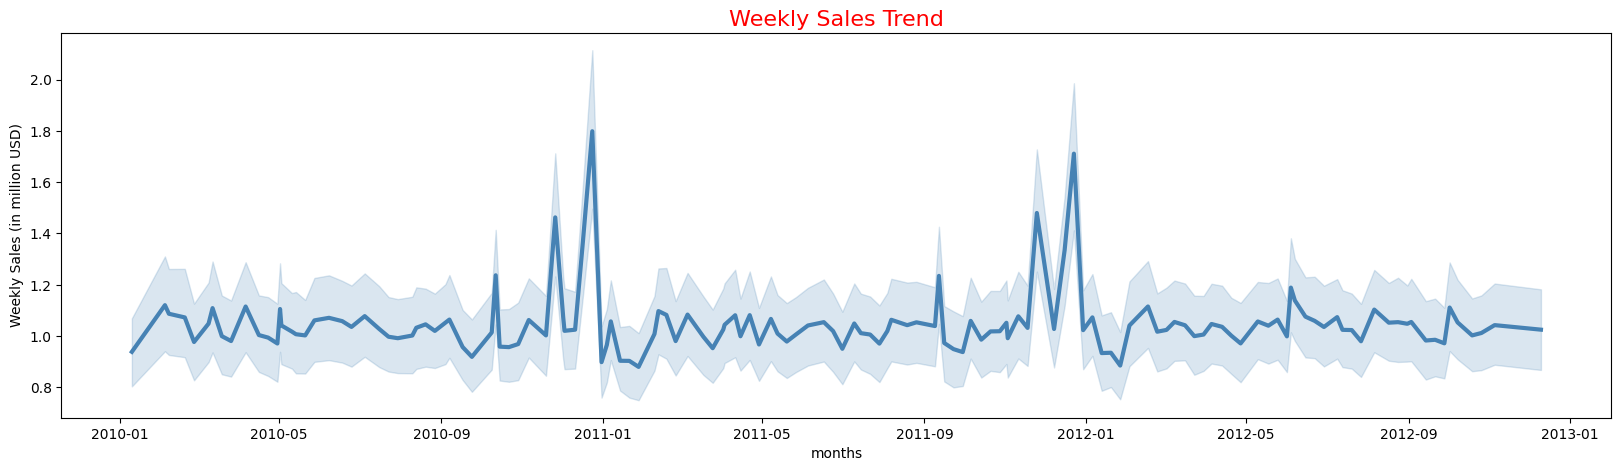

In [3]:
###BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(20, 5))

sns.set_palette("muted")
sns.lineplot(x=df_walmart.Date, y=(df_walmart.Weekly_Sales/1e6), linewidth = 3, color = 'steelblue')
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()
###END SOLUTION

## Task 2: Let's confirm the stable trend by a lagged plot

Create the following plot. Your figure should look similar (though not necessarily identical)

You will see the sale trend is stable and there are seasonal peaks
![Task 2](./images/task2.png)

/home/LC/doth02/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:443: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(y1, y2, **kwds)


Text(0.5, 1.0, 'Weekly Sales in million USD')

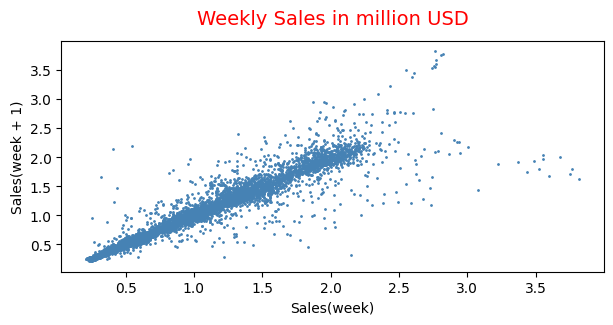

In [4]:
###BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(7, 3))

df_one_year = df_walmart['Weekly_Sales'] / 1e6

pd.plotting.lag_plot(df_one_year, lag=1, ax=ax, c = 'steelblue',
                     cmap = 'GnBu', alpha = 1, s = 1)
ax.set_xlabel('Sales(week)')
ax.set_ylabel('Sales(week + 1)')
ax.set_title('Weekly Sales in million USD', fontdict ={'fontsize':14,
                                                                   'color':'red',
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
### END SOLUTION

## Task 3: Is there any pattern for seasonal sales?

Let's see which months the sales get peaks

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 3](./images/task3.png)

year           2010          2011          2012
month                                          
1      9.386639e+05  9.420697e+05  9.567817e+05
2      1.064372e+06  1.042273e+06  1.057997e+06
3      1.034590e+06  1.011263e+06  1.025510e+06
4      1.021177e+06  1.033220e+06  1.014127e+06
5      1.039303e+06  1.015565e+06  1.053948e+06
6      1.055082e+06  1.038471e+06  1.082920e+06
7      1.023702e+06  9.976049e+05  1.025480e+06
8      1.025212e+06  1.044895e+06  1.064514e+06
9      9.983559e+05  1.026810e+06  9.988663e+05
10     1.027201e+06  1.020663e+06  1.044885e+06
11     1.176097e+06  1.126535e+06  1.042797e+06
12     1.198413e+06  1.274311e+06  1.025078e+06


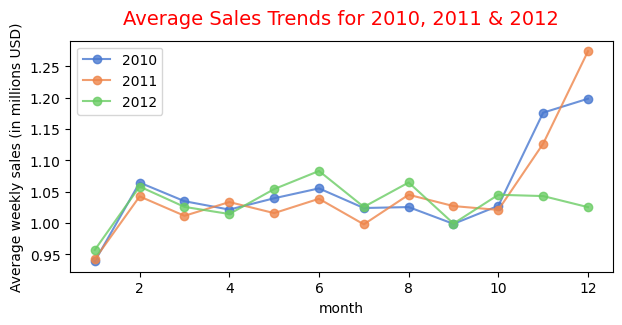

In [5]:
###BEGIN SOLUTION
df_walmart['year'] = df_walmart.Date.dt.year
df_walmart['month'] = df_walmart.Date.dt.month
df_walmart['dayofweek'] = df_walmart.Date.dt.dayofweek

pivot_table = df_walmart.pivot_table(index='month', columns='year', values='Weekly_Sales')
print (pivot_table)
pivot_table = pivot_table / 1e6
fig, ax = plt.subplots(figsize=(7, 3))

pivot_table.plot(marker="o", ax=ax, alpha = 0.8)
plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012', fontdict ={'fontsize':14,
                                                                   'color':'red',
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
plt.legend()
plt.show()
###END SOLUTION

## Task 4: Holiday and non-holiday sales for years

Let's see if there is any pattern of non-holiday and holiday sales for years.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 4](./images/task4.png)

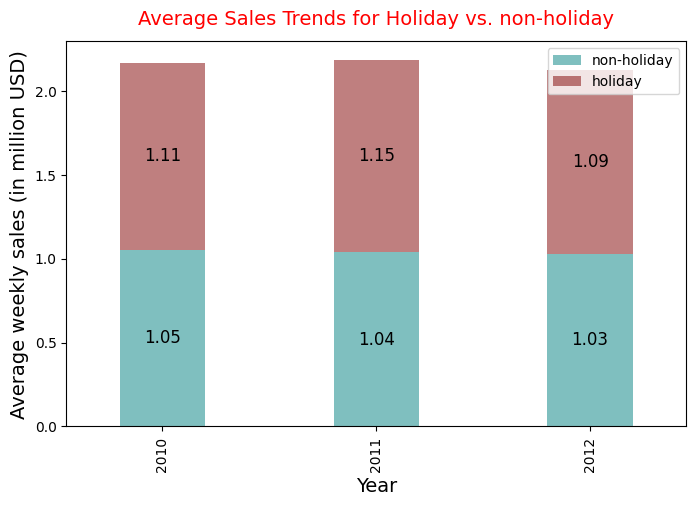

In [6]:
###BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(8, 5))


pivot_table = df_walmart.pivot_table(index='year', columns='Holiday_Flag', values='Weekly_Sales')
pivot_table = pivot_table / 1e6
pivot_table
pivot_table.plot (kind = 'bar', ax = ax, stacked = True, color = ['teal', 'maroon'], alpha = 0.5,
                 width = .4)
plt.ylabel('Average weekly sales (in million USD)', fontdict ={'fontsize':14,
                                                                   'color':'black',
                                                                   'horizontalalignment': 'center'})
plt.xlabel('Year', fontdict ={'fontsize':14,
                                                                   'color':'black',
                                                                   'horizontalalignment': 'center'})

plt.title('Average Sales Trends for Holiday vs. non-holiday', fontdict ={'fontsize':14,
                                                                   'color':'red',
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
plt.legend(["non-holiday", "holiday"])



for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
plt.show()

###END SOLUTION

## Task 5: Sales by days

Let's see if there is any pattern sales by days of week.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 5](./images/task5.png)

Text(0.5, 1.0, 'Mean Weekly Sales by Day of Week')

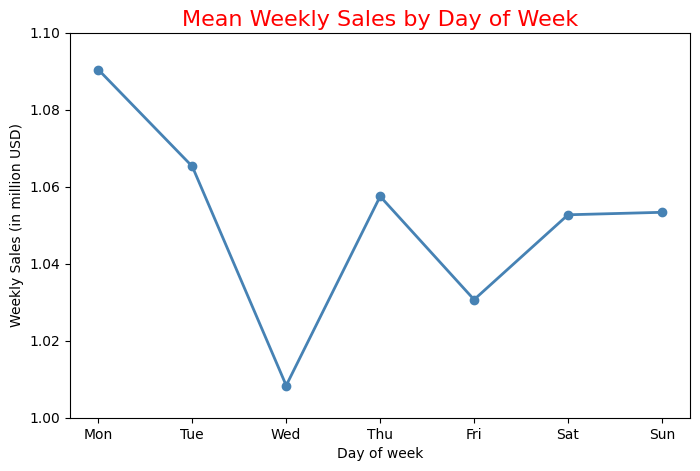

In [7]:
###BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(8, 5))

df_dayofweek = df_walmart[df_walmart.Holiday_Flag == 0].groupby('dayofweek').agg({'Weekly_Sales':'mean'})

df_dayofweek = df_dayofweek/1e6
df_dayofweek = df_dayofweek.reset_index()

xticklabels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#sns.set_palette("bright")
#sns.scatterplot(ax = ax, x=df_dayofweek.dayofweek, y=(df_dayofweek.Weekly_Sales), s=50, c = 'red')

ax.plot(df_dayofweek.dayofweek, (df_dayofweek.Weekly_Sales), linewidth = 2, color = 'steelblue', marker = 'o')
ax.set_ylim([1, 1.1])
ax.set_xticks(range(0, df_dayofweek.shape[0]))
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Day of week')
ax.set_ylabel('Weekly Sales (in million USD)')
ax.set_title('Mean Weekly Sales by Day of Week',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

###END SOLUTION